# Project: TMDB Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load and view dataset 

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.iloc[1,:]

id                                                                  76341
imdb_id                                                         tt1392190
popularity                                                        28.4199
budget                                                          150000000
revenue                                                         378436354
original_title                                         Mad Max: Fury Road
cast                    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
homepage                                      http://www.madmaxmovie.com/
director                                                    George Miller
tagline                                                What a Lovely Day.
keywords                 future|chase|post-apocalyptic|dystopia|australia
overview                An apocalyptic story set in the furthest reach...
runtime                                                               120
genres                          Action

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>There are unneeded columns like **tagline, homepage, cast, keywords, release_date, overview, imdb_id, director, and production_companies**

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>The min value of **budget and revenue** columns is 0, it doesn't make sense
After investegation, it is missing data, **the 0 values the must be Nan**

In [6]:
zero_budg = df.budget == 0
zero_rev = df.revenue == 0
print(f'There are {df[zero_budg].shape[0]} rows with 0 values at budget')
print(f'There are {df[zero_rev].shape[0]} rows with 0 values at revenue')

There are 5696 rows with 0 values at budget
There are 6016 rows with 0 values at revenue


In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


>There is **one duplacted row**

## Data Cleaning
- Drop unneeded columns **(tagline, homepage, cast, keywords, release_date, overview, imdb_id)**
- Replace 0 values with Nan in **revenue and budget columns**
- Drop rows which have Nan values in **revenue and budget columns**
- Delete the duplacted rows
- Create 2 new columns called profit, profit_adj

### Drop unneeded columns (tagline, homepage, cast, keywords, release_date, overview, imdb_id, director, production_companies)

In [8]:
df.drop(columns=['tagline', 'homepage', 'cast', 'keywords', 
                 'release_date', 'overview', 'imdb_id', 
                 'production_companies','director'],inplace=True)

In [9]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


### Replace 0 values with Nan in revenue and budget columns

In [10]:
df.replace(0, np.nan, inplace=True)

In [11]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          5170 non-null   float64
 3   revenue         4850 non-null   float64
 4   original_title  10866 non-null  object 
 5   runtime         10835 non-null  float64
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      5170 non-null   float64
 11  revenue_adj     4850 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1018.8+ KB


### Drop rows which have Nan values in revenue and budget columns

In [12]:
df.dropna(subset = ['revenue','budget'], inplace=True)

In [13]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   popularity      3855 non-null   float64
 2   budget          3855 non-null   float64
 3   revenue         3855 non-null   float64
 4   original_title  3855 non-null   object 
 5   runtime         3855 non-null   float64
 6   genres          3855 non-null   object 
 7   vote_count      3855 non-null   int64  
 8   vote_average    3855 non-null   float64
 9   release_year    3855 non-null   int64  
 10  budget_adj      3855 non-null   float64
 11  revenue_adj     3855 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 391.5+ KB


### Delete the duplacted rows

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
# Checking
df.duplicated().sum()

0

### Create 2 new columns called profit, profit_adj

In [17]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [18]:
df['profit'] = df['revenue'] - df['budget']

In [19]:
# Checking
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,1.316249e+09


In [20]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   float64
 3   revenue         3854 non-null   float64
 4   original_title  3854 non-null   object 
 5   runtime         3854 non-null   float64
 6   genres          3854 non-null   object 
 7   vote_count      3854 non-null   int64  
 8   vote_average    3854 non-null   float64
 9   release_year    3854 non-null   int64  
 10  budget_adj      3854 non-null   float64
 11  revenue_adj     3854 non-null   float64
 12  profit_adj      3854 non-null   float64
 13  profit          3854 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 451.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What is the movie that has higest profit in terms of 2010 dollars and without it?

In [21]:
top_profit_adj = df.sort_values(by='profit_adj',ascending=False)[:10]

In [22]:
top_profit_adj.loc[:,['original_title','profit_adj']].reset_index(drop=True)

,original_title,profit_adj
0,Star Wars,2.750137e+09
1,Avatar,2.586237e+09
2,Titanic,2.234714e+09
3,The Exorcist,2.128036e+09
4,Jaws,1.878643e+09
5,E.T. the Extra-Terrestrial,1.767968e+09
6,Star Wars: The Force Awakens,1.718723e+09
7,The Net,1.551568e+09
8,One Hundred and One Dalmatians,1.545635e+09
9,The Empire Strikes Back,1.376998e+09


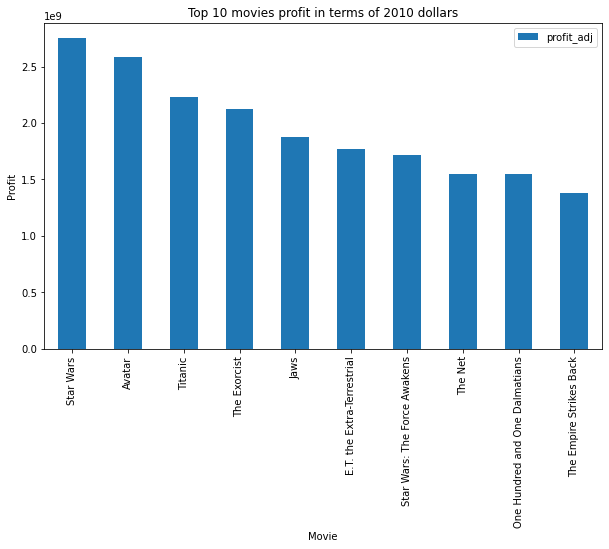

In [23]:
top_profit_adj.plot(kind='bar', x='original_title', y='profit_adj',
                    xlabel='Movie', ylabel='Profit',
                    figsize=(10,6),title='Top 10 movies profit in terms of 2010 dollars');

### Conclusions
> The movie that has the highest profit in terms of 2010 dollars is **Star Wars(1977)**

In [24]:
top_profit = df.sort_values(by='profit',ascending=False)[:10]

In [25]:
top_profit.loc[:,['original_title','profit']].reset_index(drop=True)

,original_title,profit
0,Avatar,2.544506e+09
1,Star Wars: The Force Awakens,1.868178e+09
2,Titanic,1.645034e+09
3,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09
5,The Avengers,1.299558e+09
6,Harry Potter and the Deathly Hallows: Part 2,1.202818e+09
7,Avengers: Age of Ultron,1.125036e+09
8,Frozen,1.124219e+09
9,The Net,1.084280e+09


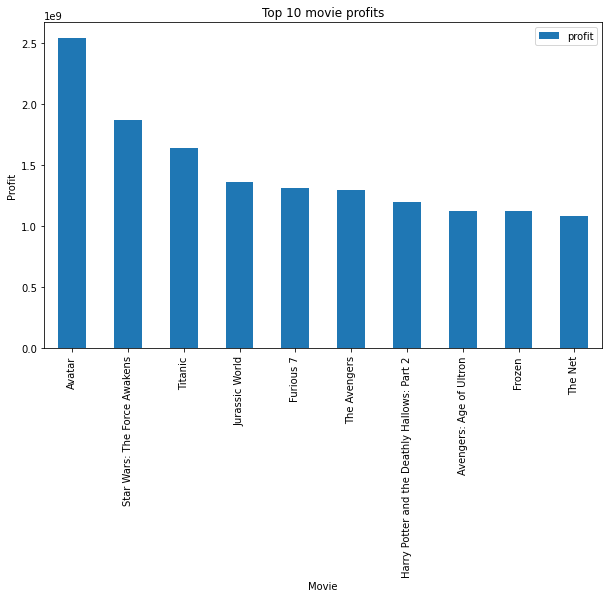

In [26]:
top_profit.plot(kind='bar', x='original_title', y='profit',
                xlabel='Movie', ylabel='Profit',
                figsize=(10,6),title='Top 10 movie profits');

### Conclusion
> The movie that has the highest profit is **Avatar(2009)**

### Question 2:  is there a correlation between budget and profit?

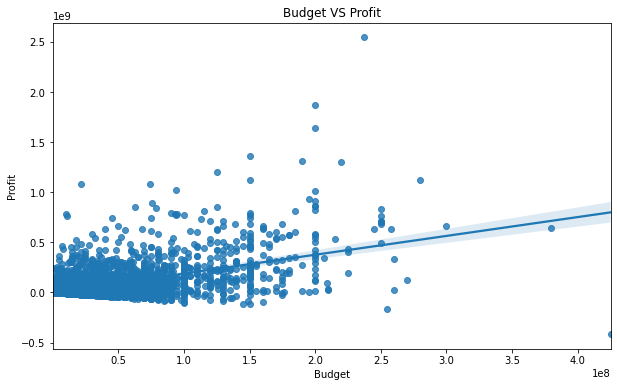

In [27]:
_, ax = plt.subplots(figsize=(10,6))
ax.set_title('Budget VS Profit')
g = sns.regplot(x=df['budget'], y=df['profit'],ax=ax);
g.set(title='Budget VS Profit', xlabel='Budget', ylabel='Profit');

### Conclusion
>**Yes**, There is a **postive correlation** between **budget and profit**.<br>
When the budget of the movie is high, there is a high probabilty to has high profit.

### Question 3:  Are movies with high budget has high voting?

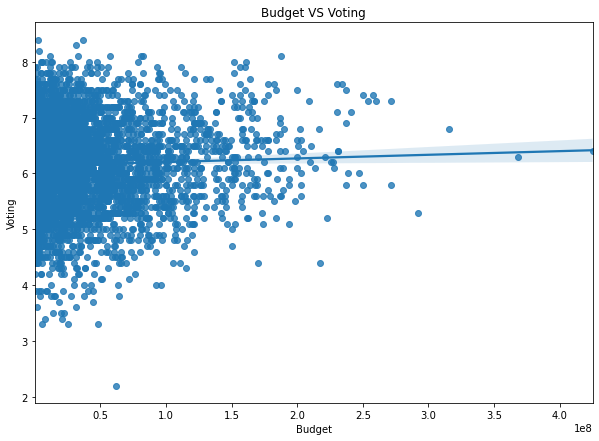

In [28]:
_, ax = plt.subplots(figsize=(10,7))

g = sns.regplot(x=df['budget_adj'], y=df['vote_average'], ax=ax)
g.set(title='Budget VS Voting', xlabel='Budget', ylabel='Voting');

### Conclusion
> As shown in figure, high budget doesn't mean high voting, also low budget doesn't mean low voting.
There are many movies with low budget and have high voting.
There is **very weak postive correlation*(or you can say that there is no correlation)*** between the budget and average voting

### Question 4:  are movies with high profit has high voting?

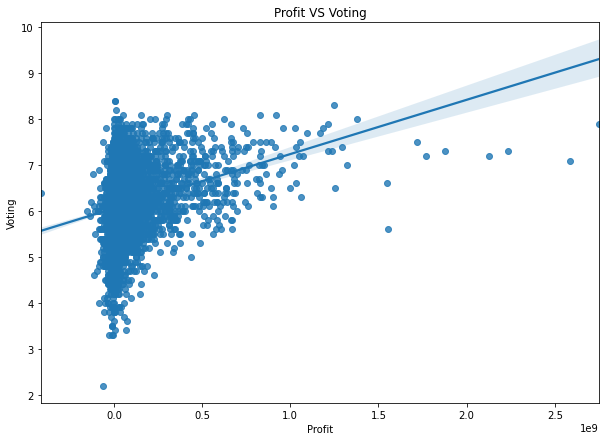

In [29]:
_, ax = plt.subplots(figsize=(10,7))
g=sns.regplot(x=df['profit_adj'], y=df['vote_average'], ax=ax)

#set Title, x_label and y_label
g.set(title='Profit VS Voting', xlabel='Profit', ylabel='Voting');

### Conclusion
> **Yes**, there is a **postive correlation** between profit and voting.

> The movie with high profit, it most likely will have a high voting.

### Question 5:  Do movies production increase through time?

In [30]:
no_movies_year = df.release_year.value_counts().sort_index()

<AxesSubplot:title={'center':'Total No. of movies each year'}, xlabel='Year', ylabel='No. of movies'>

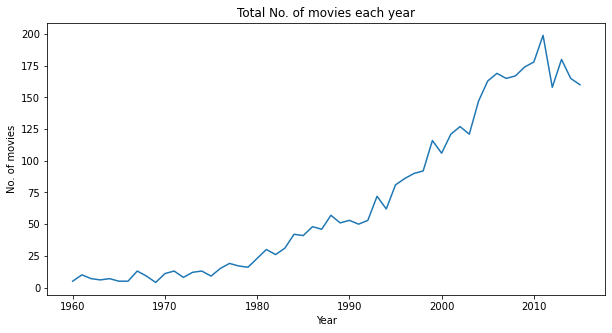

In [31]:
no_movies_year.plot(figsize=(10,5), xlabel='Year', ylabel='No. of movies',
                    title='Total No. of movies each year')

### Conclusion
>**Yes**, the movies production **increases** through years.

### Question 6: What is the correlation between runtime and budget?

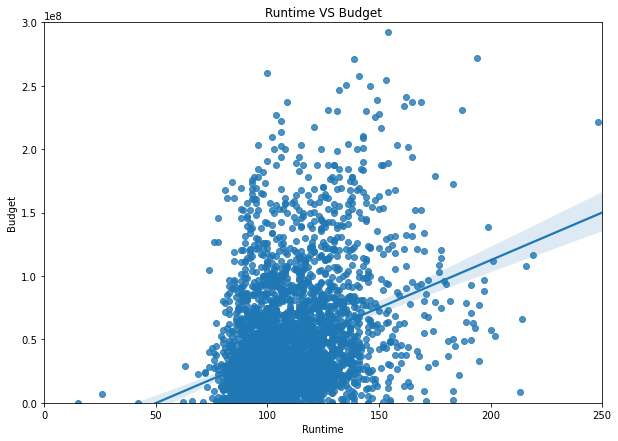

In [32]:
_, ax = plt.subplots(figsize=(10,7))
g = sns.regplot(x=df['runtime'], y=df['budget_adj'], ax=ax)

#set graph options
g.set(xlim=(0,250), ylim=(0,3*10**8), title='Runtime VS Budget', xlabel='Runtime', ylabel='Budget');

### Conclusion
> There is **postive correlation** between movie runtime and budget

### Question 7: What is the behavior of runtime through years?

In [33]:
runtime_year = df.groupby('release_year').mean()

<AxesSubplot:title={'center':'the behavior of runtime through years'}, xlabel='Year', ylabel='Runtime Mean'>

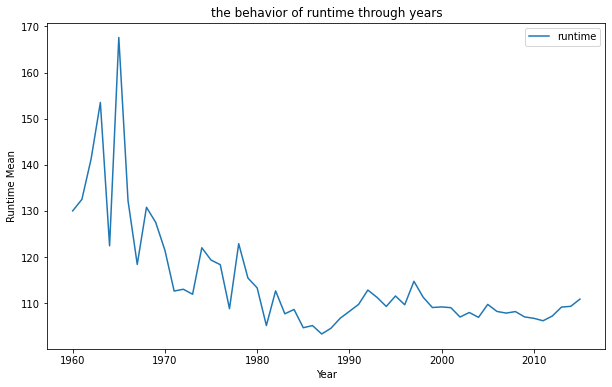

In [34]:
runtime_year.plot(y='runtime', figsize=(10,6), xlabel='Year', ylabel='Runtime Mean',
                  title='the behavior of runtime through years')

### Conclusions
> The runtime of the movies **deacrease** through years

<a id='conclusions'></a>
## Conclusions

- The movie that has the highest profit is **Avatar(2009)**.
- The movie that has the highest profit in terms of 2010 dollars is **Star Wars(1977)**.
- There is a **postive correlation** between **budget and profit**. Therefore, When the **budget** of the movie is **high**, there is a **high probabilty** to has **high profit**.
- **High budget** does **NOT** mean **high voting rate**, also **low budget** does **NOT** mean **low voting**.
- The movie with high profit, it most likely will have a high voting.
- The movies production **increases** through years.
- More runtime most probable means high budget.
- The movies runtime **decreases** through years.


## Limitations

- There is unneeded columns.
- The missing values in revenue and budget columns represented by 0 value.
- There are 6016 rows with Nan at budget or revenue columns.
- There is one duplicated row.
- There are short movies in the dataset.